# Windy Gridworld SAS

![title](windy_gridworld_pic.png)

# Load Packages

In [1]:
import swat
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import gym
import gym_windygw

# Connect to CAS

In [2]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Make Environment

In [3]:
env = gym.make('windygw-v0')

[['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['S' '-' '-' '-' '-' '-' '-' 'G' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']]


In [4]:
# Env Actions
directions = {"Up":0,"Down":1,"Left":2,"Right":3}
env.action_space

Discrete(4)

In [5]:
# Env Grid
env.observation_space

Box(0.0, 10.0, (2,), float32)

In [6]:
# Env Start
env.reset()

[3, 0]

In [7]:
# Take a Step
env.step(0)

([2, 0], -1, False, {})

# Create SAS RL Environment URL

In [8]:
cmd_data = subprocess.check_output(['ipconfig','/all']).decode('utf-8').split('\n')
ip_data = [item for item in cmd_data if "IPv4 Address" in item]
computer_id = ip_data[0].split(": ")[1].split("(")[0]
sasrl_env_port = "10200"
sasrl_env_url = computer_id + ":" + sasrl_env_port

# Load the RL Action Set

In [9]:
conn.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.34s, user: 0.54s, sys: 0.783s, mem: 0.255mb

# Train the Agent - Deep Q Networks

In [10]:
results = conn.reinforcementLearn.rlTrainDqn(
    
    # RL Arguments
    environment=dict(type='remote', url=sasrl_env_url, name='windygw-v0', render=False, seed=802),
    exploration = dict(type="linear", initialEpsilon=0.99, minEpsilon=0.05),
    gamma = 0.99,
    numEpisodes = 100,
    
    # NN Arguments
    QModel=[{'type':'FC', 'n':100, 'act':'RELU'}],
    optimizer=dict(method='ADAM', beta1=0.9, beta2=0.999, learningRate=0.001, miniBatchSize=128),
    minReplayMemory = 10,
    maxReplayMemory = 1000,
    targetUpdateInterval = 100,
    
    # Test Arguments
    testInterval = 10,
    numTestEpisodes = 10,
    
    # Other Arguments
    modelOut=dict(name='dqn_weights', replace=True),
    seed = 919
    
)

         Episode=        0 AvgQValue=-0.236 AvgTarget=-0.232 AvgLoss=0.0134 TestReward=  -200
         Episode=       10 AvgQValue=-13.58 AvgTarget=-13.54 AvgLoss=2.5523 TestReward=  -200
         Episode=       20 AvgQValue=-19.34 AvgTarget=-19.22 AvgLoss=2.7166 TestReward=  -200
         Episode=       30 AvgQValue=-19.64 AvgTarget=-19.84 AvgLoss=1.3426 TestReward=  -200
         Episode=       40 AvgQValue=-15.64 AvgTarget=-15.72 AvgLoss=1.0897 TestReward=  -200
         Episode=       50 AvgQValue=-13.99 AvgTarget=-13.91 AvgLoss=0.7259 TestReward=   -15
         Episode=       60 AvgQValue=-11.86 AvgTarget=-11.97 AvgLoss=0.6145 TestReward=   -15
         Episode=       70 AvgQValue=-10.63 AvgTarget=-10.66 AvgLoss=0.9299 TestReward=   -15
         Episode=       80 AvgQValue=-10.99 AvgTarget=-10.85 AvgLoss=0.6588 TestReward=   -15
         Episode=       90 AvgQValue= -11.2 AvgTarget=-11.24 AvgLoss=0.7433 TestReward=   -15
         Episode=      100 AvgQValue=-11.22 AvgTarget=-10.98

In [11]:
results['FinalResult']

,Description,Value
0,Average QValue,-11.217489
1,Average Target Value,-10.984447
2,Test Reward,-15.000000


In [12]:
results['ModelInfo']

,Property,Value
0,Number of State Variables,2
1,Number of Actions,4
2,Algorithm,DQN
3,Optimizer,ADAM


In [13]:
results['OptIterHistory']

,Iteration,AvgQValue,AvgTarget,AvgLoss,Test Reward
0,0,-0.235674,-0.231762,0.013431,-200.0
1,10,-13.584809,-13.543026,2.552276,-200.0
2,20,-19.335915,-19.220026,2.716634,-200.0
3,30,-19.640519,-19.844557,1.342571,-200.0
4,40,-15.642542,-15.724116,1.089695,-200.0
5,50,-13.988335,-13.914927,0.725875,-15.0
6,60,-11.855989,-11.970549,0.614546,-15.0
7,70,-10.628279,-10.657606,0.929887,-15.0
8,80,-10.987502,-10.853219,0.658765,-15.0
9,90,-11.200675,-11.239091,0.743314,-15.0


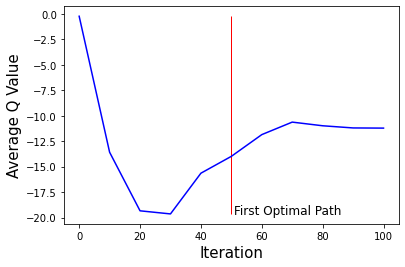

In [14]:
best_path_iter = results['OptIterHistory']['Iteration'][np.argmax(results['OptIterHistory']['Test Reward'])]

plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgQValue'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Q Value", fontsize=15)
plt.text(best_path_iter+1,min(results['OptIterHistory']['AvgQValue']),"First Optimal Path", fontsize=12)
plt.vlines(x=best_path_iter, ymin=min(results['OptIterHistory']['AvgQValue']), ymax=max(results['OptIterHistory']['AvgQValue']), color='red', lw=1)
plt.show()

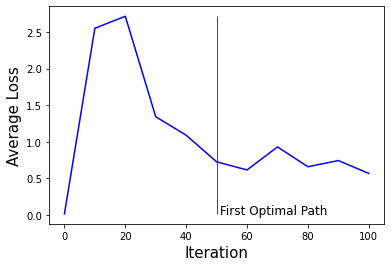

In [15]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgLoss'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Loss", fontsize=15)
plt.text(best_path_iter+1,min(results['OptIterHistory']['AvgLoss']),"First Optimal Path", fontsize=12)
plt.vlines(x=best_path_iter, ymin=min(results['OptIterHistory']['AvgLoss']), ymax=max(results['OptIterHistory']['AvgLoss']), color='red', lw=1)
plt.show()

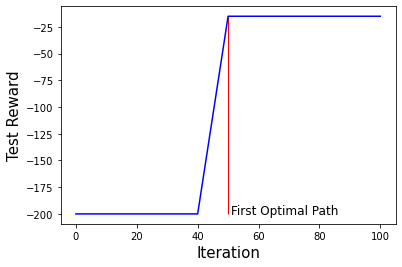

In [16]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['Test Reward'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Test Reward", fontsize=15)
plt.text(best_path_iter+1,min(results['OptIterHistory']['Test Reward']),"First Optimal Path", fontsize=12)
plt.vlines(x=best_path_iter, ymin=min(results['OptIterHistory']['Test Reward']), ymax=max(results['OptIterHistory']['Test Reward']), color='red', lw=1)
plt.show()

# Score the Model

In [17]:
conn.reinforcementLearn.rlScore(
    environment=dict(type='remote', url=sasrl_env_url, name='windygw-v0', render=False),
    model='dqn_weights',
    numEpisodes=1,
    logFreq=1,
    casout=dict(name='scored_table', replace=True)
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=    -1
         Episode=        1 Step=        2 LastReward=     0 AverageReward=    -2
         Episode=        1 Step=        3 LastReward=     0 AverageReward=    -3
         Episode=        1 Step=        4 LastReward=     0 AverageReward=    -4
         Episode=        1 Step=        5 LastReward=     0 AverageReward=    -5
         Episode=        1 Step=        6 LastReward=     0 AverageReward=    -6
         Episode=        1 Step=        7 LastReward=     0 AverageReward=    -7
         Episode=        1 Step=        8 LastReward=     0 AverageReward=    -8
         Episode=        1 Step=        9 LastReward=     0 AverageReward=    -9
         Episode=        1 Step=       10 LastReward=     0 AverageReward=   -10
         Episode=        1 Step=       11 LastReward=     0 AverageReward=   -11
         Episode=        1 Step=       12 LastReward=     0 AverageReward=   -12
         Episode=        1 S

,Property,Value
0,Number of State Variables,2
1,Number of Actions,4
2,Algorithm,DQN
3,Optimizer,ADAM


# Download Final Test

In [18]:
scored_table = conn.CASTable(name = "scored_table")
df = scored_table.to_frame()
df

,_Step_,_Episode_,_State_0,_State_1,_Action_,_Reward_,_Done_
0,0.0,1.0,3.0,0.0,3.0,-1.0,0.0
1,1.0,1.0,3.0,1.0,3.0,-1.0,0.0
2,2.0,1.0,3.0,2.0,3.0,-1.0,0.0
3,3.0,1.0,3.0,3.0,3.0,-1.0,0.0
4,4.0,1.0,2.0,4.0,3.0,-1.0,0.0
5,5.0,1.0,1.0,5.0,3.0,-1.0,0.0
6,6.0,1.0,0.0,6.0,3.0,-1.0,0.0
7,7.0,1.0,0.0,7.0,3.0,-1.0,0.0
8,8.0,1.0,0.0,8.0,3.0,-1.0,0.0
9,9.0,1.0,0.0,9.0,1.0,-1.0,0.0


# Find Optimal Path

In [19]:
# Set Row and Column Arrays
state_x = np.array(df["_State_0"], dtype="i")
state_y = np.array(df["_State_1"], dtype="i")

#Initialize Grid
grid = np.full((7, 10), "-")
grid[3,0] = "S"
grid[3,7] = "G"

# Mark the Agent's Path
for i in range(df.shape[0]-1):
    grid[state_x[i+1],state_y[i+1]] = "A"

# Print Optimal Path
print(grid)

[['-' '-' '-' '-' '-' '-' 'A' 'A' 'A' 'A']
 ['-' '-' '-' '-' '-' 'A' '-' '-' '-' 'A']
 ['-' '-' '-' '-' 'A' '-' '-' '-' '-' 'A']
 ['S' 'A' 'A' 'A' '-' '-' '-' 'G' '-' 'A']
 ['-' '-' '-' '-' '-' '-' '-' '-' 'A' 'A']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']]


# End the Session

In [20]:
conn.session.endSession()

+ Elapsed: 0.000655s, user: 0.000581s, sys: 3.3e-05s, mem: 0.203mb